# 类属性和类方法

## 目标

* 类的结构
* 类属性和实例属性
* 类方法和静态方法

## 01. 类的结构

### 1.1 术语 —— 实例

1. 使用面相对象开发，**第 1 步** 是设计 **类**
2. 使用 **类名()** 创建对象，**创建对象** 的动作有两步：
    * 1) 在内存中为对象 **分配空间**
    * 2) 调用初始化方法 `__init__` 为 **对象初始化**
3. 对象创建后，**内存** 中就有了一个对象的 **实实在在** 的存在 —— **实例**

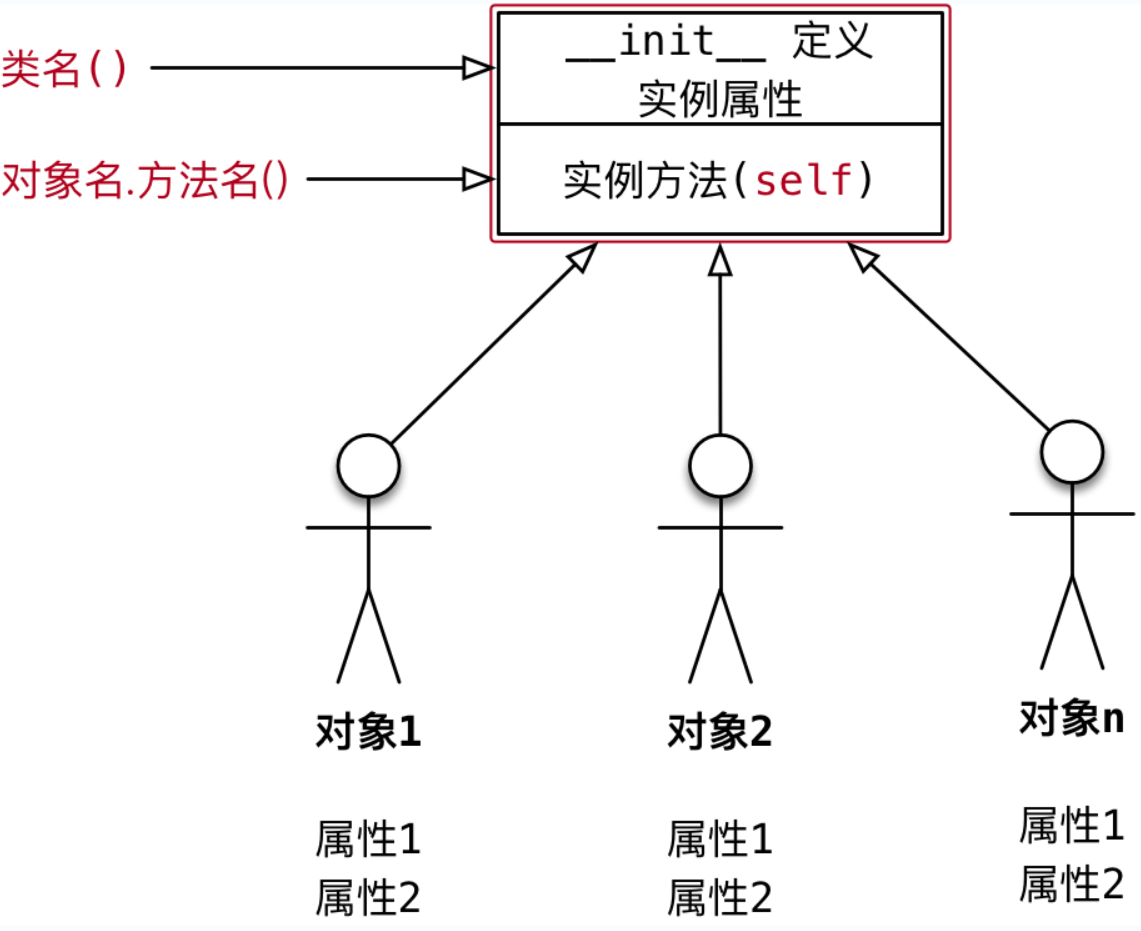

因此，通常也会把：

1. 创建出来的 **对象** 叫做 **类** 的 **实例**
2. 创建对象的 **动作** 叫做 **实例化**
3. **对象的属性** 叫做 **实例属性**
4. **对象调用的方法** 叫做 **实例方法**

在程序执行时：

1. 对象各自拥有自己的 **实例属性**
2. 调用对象方法，可以通过 `self.` 
    * 访问自己的属性
    * 调用自己的方法

**结论**

* **每一个对象** 都有自己 **独立的内存空间**，**保存各自不同的属性**
* **多个对象的方法**，**在内存中只有一份**，在调用方法时，**需要把对象的引用** 传递到方法内部

### 1.2 类是一个特殊的对象

> `Python` 中 **一切皆对象**：
> 
> * `class AAA:` 定义的类属于 **类对象**
> * `obj1 = AAA()` 属于 **实例对象**

* 在程序运行时，**类** 同样 **会被加载到内存**
* 在 `Python` 中，**类** 是一个特殊的对象 —— **类对象**
* 在程序运行时，**类对象** 在内存中 **只有一份**，使用 **一个类** 可以创建出 **很多个对象实例**
* 除了封装 **实例** 的 **属性** 和 **方法**外，**类对象** 还可以拥有自己的 **属性** 和 **方法**
    1. **类属性**
    2. **类方法**
* 通过 **类名.** 的方式可以 **访问类的属性** 或者 **调用类的方法**

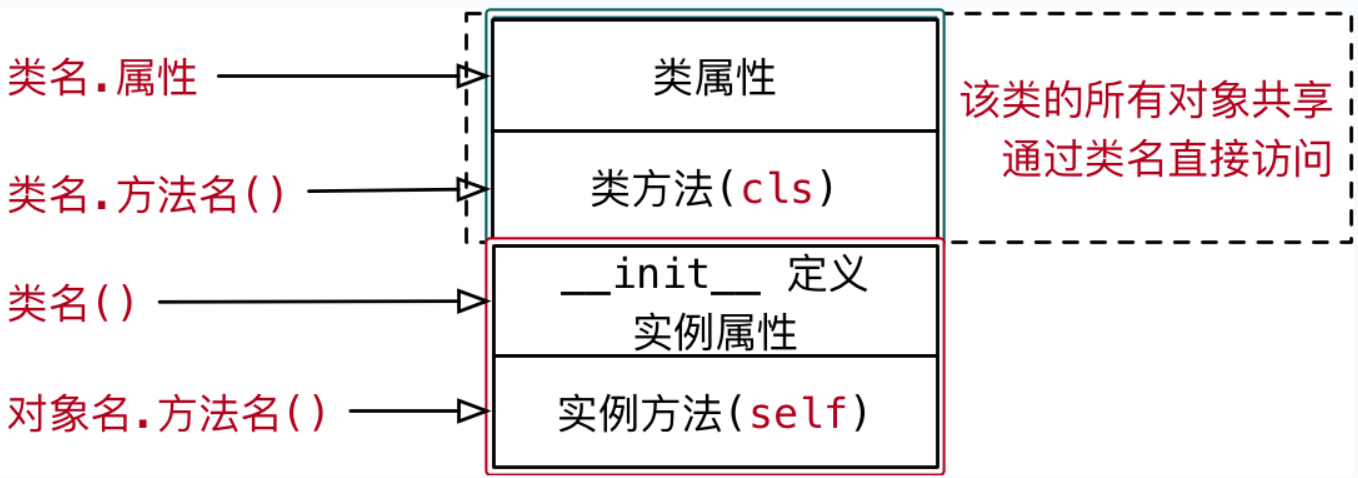

## 02. 类属性和实例属性

### 2.1 概念和使用

* **类属性** 就是给 **类对象** 中定义的 **属性**
* 通常用来记录 **与这个类相关** 的特征
* **类属性** **不会用于**记录 **具体对象的特征**

**示例需求**

* 定义一个 **工具类**
* 每件工具都有自己的 `name`
* **需求** —— 知道使用这个类，创建了多少个工具对象？

In [6]:
class Tool(object):

    # 使用赋值语句，定义类属性，记录创建工具对象的总数
    count = 0

    def __init__(self, name):
        self.name = name

        # 针对类属性做一个计数+1
        Tool.count += 1


# 创建工具对象
tool1 = Tool("斧头")
tool2 = Tool("榔头")
tool3 = Tool("铁锹")
tool4 = Tool("锤子")

# 知道使用 Tool 类到底创建了多少个对象?
print("现在创建了 %d 个工具" % tool2.count)
Tool.count

现在创建了 4 个工具


4

### 2.2 属性的获取机制（科普）

* 在 `Python` 中 **属性的获取** 存在一个 **向上查找机制**

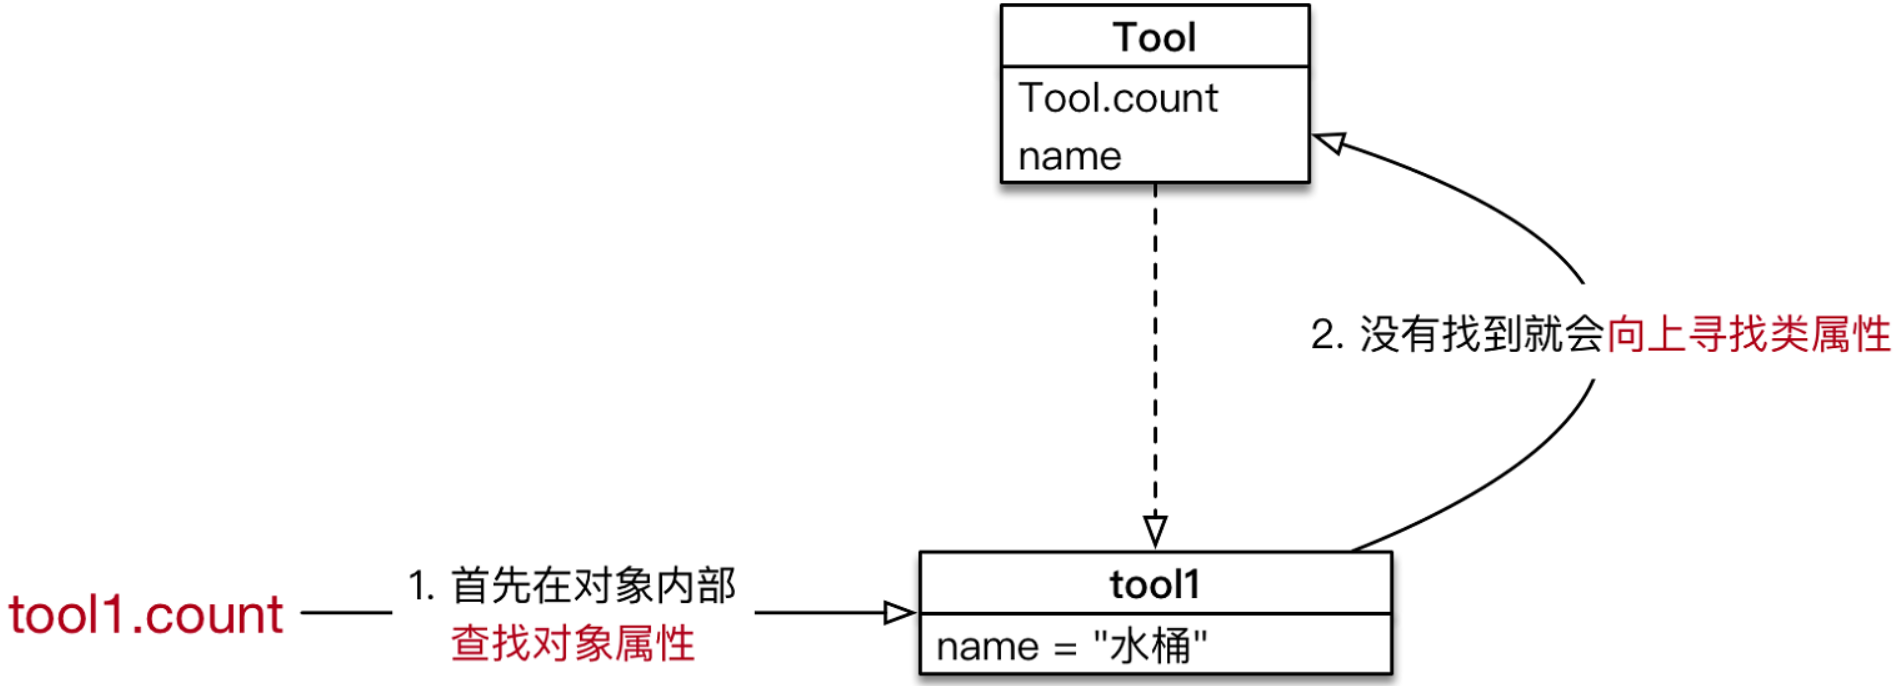


* 因此，要访问类属性有两种方式：
    1. **类名.类属性**
    2. **对象.类属性** （不推荐）

**注意**

* 如果使用 `对象.类属性 = 值` 赋值语句，只会 **给对象添加一个属性**，而不会影响到 **类属性的值**

In [11]:
tool3.count = 99
print(tool3.count)
print(Tool.count)

99
4


## 03. 类方法和静态方法

### 3.1 类方法

* **类属性** 就是针对 **类对象** 定义的属性
    * 使用 **赋值语句** 在 `class` 关键字下方可以定义 **类属性**
    * **类属性** 用于记录 **与这个类相关** 的特征
* **类方法** 就是针对 **类对象** 定义的方法
    * 在 **类方法** 内部可以直接访问 **类属性** 或者调用其他的 **类方法**

**语法如下**

```python
@classmethod
def 类方法名(cls):
    pass
```

* 类方法需要用 **修饰器** `@classmethod` 来标识，**告诉解释器这是一个类方法**
* 类方法的 **第一个参数** 应该是 `cls`
    * 由 **哪一个类** 调用的方法，方法内的 `cls` 就是 **哪一个类的引用**
    * 这个参数和 **实例方法** 的第一个参数是 `self` 类似
    * **提示** 使用其他名称也可以，不过习惯使用 `cls`
3. 通过 **类名.** 调用 **类方法**，**调用方法时**，不需要传递 `cls` 参数
4. **在方法内部**
    * 可以通过 `cls.` **访问类的属性**
    * 也可以通过 `cls.` **调用其他的类方法**

**示例需求**

* 定义一个 **工具类**
* 每件工具都有自己的 `name`
* **需求** —— 在 **类** 封装一个 `show_tool_count` 的类方法，输出使用当前这个类，创建的对象个数


In [13]:
class Tool(object):

    # 使用赋值语句，定义类属性，记录创建工具对象的总数
    count = 0
    
    #调用类方法
    @classmethod
    def show_tool_count(cls):
        print("数量%d"%cls.count)

    def __init__(self, name):
        self.name = name

        # 针对类属性做一个计数+1
        Tool.count += 1


# 创建工具对象
tool1 = Tool("斧头")
tool2 = Tool("榔头")
tool3 = Tool("铁锹")
Tool.show_tool_count()


数量3


### 3.2 静态方法

* 在开发时，如果需要在 **类** 中封装一个方法，这个方法：
    * 既 **不需要** 访问 **实例属性** 或者调用 **实例方法**
    * 也 **不需要** 访问 **类属性** 或者调用 **类方法**
    
* 这个时候，可以把这个方法封装成一个 **静态方法**

**语法如下**

```python
@staticmethod
def 静态方法名():
    pass
```

* **静态方法** 需要用 **修饰器** `@staticmethod` 来标识，**告诉解释器这是一个静态方法**
* 通过 **类名.** 调用 **静态方法**

In [15]:
class Dog(object):
    
    # 狗对象计数
    dog_count = 0
    
    @staticmethod
    def run():  #不需要self，cls
        
        # 不需要访问实例属性也不需要访问类属性的方法
        print("狗在跑...")

    def __init__(self, name):
        self.name = name
        
Dog.run()  #不访问任何属性

狗在跑...


### 3.3 方法综合案例

**需求**

1. 设计一个 `Game` 类
2. 属性：
    * 定义一个 **类属性** `top_score` 记录游戏的 **历史最高分**
    * 定义一个 **实例属性** `player_name` 记录 **当前游戏的玩家姓名**
3. 方法：
    * **静态方法** `show_help` 显示游戏帮助信息
    * **类方法** `show_top_score` 显示历史最高分
    * **实例方法** `start_game` 开始当前玩家的游戏
4. 主程序步骤
    * 1) 查看帮助信息
    * 2) 查看历史最高分
    * 3) 创建游戏对象，开始游戏

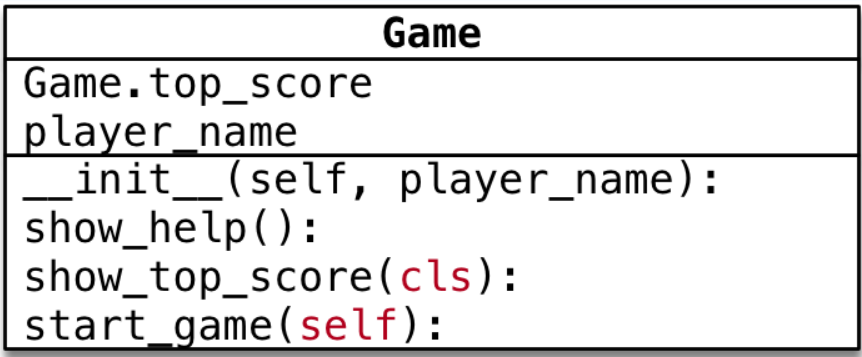

#### 案例小结

1. **实例方法** —— 方法内部需要访问 **实例属性**
    * **实例方法** 内部可以使用 **类名.** 访问类属性
2. **类方法** —— 方法内部 **只** 需要访问 **类属性**
3. **静态方法** —— 方法内部，不需要访问 **实例属性** 和 **类属性**

**提问**

如果方法内部 即需要访问 **实例属性**，又需要访问 **类属性**，应该定义成什么方法？

**答案**

* 应该定义 **实例方法**
* 因为，**类只有一个**，在 **实例方法** 内部可以使用 **类名.** 访问类属性

In [20]:
class Game(object):
    
    top_socre = 0
    
    def __init__(self,player_name):
        self.player_name = player_name
    
    @staticmethod
    def show_help():
        print("帮助信息")
        
    @classmethod
    def show_top_score(cls):
        print("历史记录%d"%cls.top_socre)
    
    def start_game(self):
        print("%s开始游戏啦..."%self.player_name)
        
        
        
Game.show_help()
Game.show_top_score()
game = Game("小明")
game.start_game()


帮助信息
历史记录0
小明开始游戏啦...
